## Initial EDA

Here we will load in the data and first look at our target variable


In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
df = pd.read_excel('../default_of_credit_card_clients.xls', header=0)

df.columns = df.iloc[0,:]

df.rename(index=str, columns={"default payment next month": "Y"}, inplace=True)

df.drop('ID', inplace=True, axis=0)

y = df.Y

df.head()

ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 ...  \
1      20000   2         2        1  24     2     2    -1    -1    -2 ...   
2     120000   2         2        2  26    -1     2     0     0     0 ...   
3      90000   2         2        2  34     0     0     0     0     0 ...   
4      50000   2         2        1  37     0     0     0     0     0 ...   
5      50000   1         2        1  57    -1     0    -1     0     0 ...   

ID BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
1          0         0         0        0      689        0        0        0   
2       3272      3455      3261        0     1000     1000     1000        0   
3      14331     14948     15549     1518     1500     1000     1000     1000   
4      28314     28959     29547     2000     2019     1200     1100     1069   
5      20940     19146     19131     2000    36681    10000     9000      689   

ID PAY_AMT6  Y  
1         0  1  
2      2000  1  
3      5000  0  
4      1000  0  
5       679  0  

[5 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null object
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null object
PAY_0        30000 non-null object
PAY_2        30000 non-null object
PAY_3        30000 non-null object
PAY_4        30000 non-null object
PAY_5        30000 non-null object
PAY_6        30000 non-null object
BILL_AMT1    30000 non-null object
BILL_AMT2    30000 non-null object
BILL_AMT3    30000 non-null object
BILL_AMT4    30000 non-null object
BILL_AMT5    30000 non-null object
BILL_AMT6    30000 non-null object
PAY_AMT1     30000 non-null object
PAY_AMT2     30000 non-null object
PAY_AMT3     30000 non-null object
PAY_AMT4     30000 non-null object
PAY_AMT5     30000 non-null object
PAY_AMT6     30000 non-null object
Y            30000 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


In [5]:
#find out missing values
names = []
value = []
for col in df.columns:
    names.append(col)
    value.append(df[col].isnull().sum())
    print("number of missing values: ", names[-1], value[-1],"""     """, "Percentage of missing values:", names[-1], round((value[-1]/682)*100))
    
  

number of missing values:  LIMIT_BAL 0       Percentage of missing values: LIMIT_BAL 0.0
number of missing values:  SEX 0       Percentage of missing values: SEX 0.0
number of missing values:  EDUCATION 0       Percentage of missing values: EDUCATION 0.0
number of missing values:  MARRIAGE 0       Percentage of missing values: MARRIAGE 0.0
number of missing values:  AGE 0       Percentage of missing values: AGE 0.0
number of missing values:  PAY_0 0       Percentage of missing values: PAY_0 0.0
number of missing values:  PAY_2 0       Percentage of missing values: PAY_2 0.0
number of missing values:  PAY_3 0       Percentage of missing values: PAY_3 0.0
number of missing values:  PAY_4 0       Percentage of missing values: PAY_4 0.0
number of missing values:  PAY_5 0       Percentage of missing values: PAY_5 0.0
number of missing values:  PAY_6 0       Percentage of missing values: PAY_6 0.0
number of missing values:  BILL_AMT1 0       Percentage of missing values: BILL_AMT1 0.0
number

Since every column is an object, we'll have to convert them to a numeric type. We'll use the data dictionary from UCI Machine Learning Repository website as a preliminary data dictionary to guide us.

From the UCI Machine Learning Repository website:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1 (LIMIT_BIL): Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2 (SEX): (1 = male; 2 = female). 
- X3 (EDUCATION): (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4 (MARITAL STATUS): (1 = married; 2 = single; 3 = others). 
- X5 (AGE): (year). 
- X6 - X11 (PAY_0 : PAY_6): History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17 (BILL_AMT1 : BILL_AMT6): Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23 (PAY_AMT1 : PAY_AMT6): Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- Y: Made a default payment (Yes = 1, No = 0)

All of these columns should be columns should be numeric, so let's convert it all to numeric

In [6]:
df = df.astype('float32')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null float32
SEX          30000 non-null float32
EDUCATION    30000 non-null float32
MARRIAGE     30000 non-null float32
AGE          30000 non-null float32
PAY_0        30000 non-null float32
PAY_2        30000 non-null float32
PAY_3        30000 non-null float32
PAY_4        30000 non-null float32
PAY_5        30000 non-null float32
PAY_6        30000 non-null float32
BILL_AMT1    30000 non-null float32
BILL_AMT2    30000 non-null float32
BILL_AMT3    30000 non-null float32
BILL_AMT4    30000 non-null float32
BILL_AMT5    30000 non-null float32
BILL_AMT6    30000 non-null float32
PAY_AMT1     30000 non-null float32
PAY_AMT2     30000 non-null float32
PAY_AMT3     30000 non-null float32
PAY_AMT4     30000 non-null float32
PAY_AMT5     30000 non-null float32
PAY_AMT6     30000 non-null float32
Y            30000 non-null float32
dtypes: float32(24)
memory usage

In [8]:
for column in df:
    plt.figure()
    df.plot.bar([column])

ValueError: x must be a label or position

<Figure size 432x288 with 0 Axes>

# Investigate Unusual values


### The sex values appear appropiate

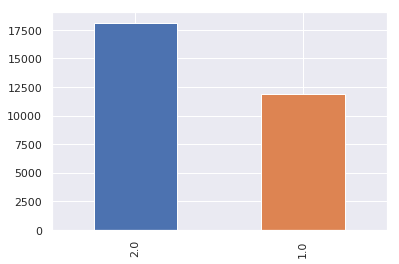

In [12]:
df.SEX.value_counts().plot(kind = "bar")
#df = df.SEX.replace([2.0], "Female")

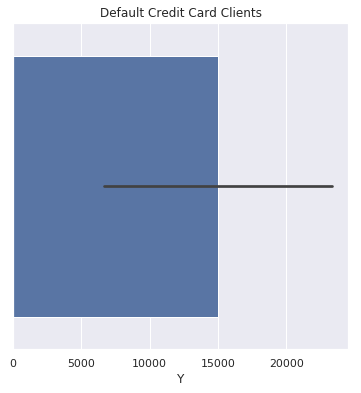

In [13]:

plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients')
sns.set_color_codes("pastel")
sns.barplot(x = df.Y.value_counts(), data=df)
locs, labels = plt.xticks()
plt.show()

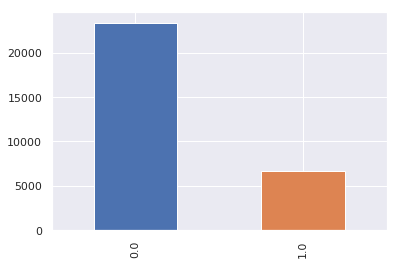

In [14]:
df.Y.value_counts().plot(kind = "bar")

### The Education values
There was values of 5.0, 6.0 and 0.0 these were replaces to the other category of 4.0

In [15]:
df.EDUCATION = df.EDUCATION.replace([5.0,6.0,0.0],4.0)
df.EDUCATION.value_counts() #.plot(kind = "bar")

2.0    14030
1.0    10585
3.0     4917
4.0      468
Name: EDUCATION, dtype: int64

### The Marriage values
There was values of o these were replaces to the other category of 3.0

In [16]:
df.MARRIAGE = df.MARRIAGE.replace([0.0],3.0)
df.MARRIAGE.value_counts()#.plot(kind = "bar")


2.0    15964
1.0    13659
3.0      377
Name: MARRIAGE, dtype: int64

## Pay Values

#### Values of -2 and 0 were noted. These were not described in the data dictionary, the -2 values were grouped together with 0 to make a new other category


In [17]:
df.PAY_0 = df.PAY_0.replace([-2.0],0.0)
df.PAY_2 = df.PAY_2.replace([-2.0],0.0)
df.PAY_3 = df.PAY_3.replace([-2.0],0.0)
df.PAY_4 = df.PAY_4.replace([-2.0],0.0)
df.PAY_5 = df.PAY_5.replace([-2.0],0.0)
df.PAY_6 = df.PAY_6.replace([-2.0],0.0)


## Outlirers


In [18]:
for i in df.describe().columns:
   Q1=df.describe().at['25%',i]
   Q3=df.describe().at['75%',i]
IQR=Q3 - Q1
LTV=Q1 - 1.5 * IQR
UTV=Q3 + 1.5 * IQR
x=np.array(df[i])
p=[]
for j in x:
    if j < LTV:
        p.append(LTV)
    elif j > UTV:
        p.append(UTV)
    else:
        p.append(j)


/opt/tljh/user/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

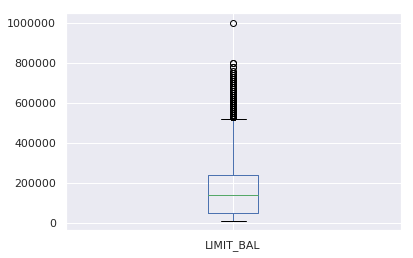

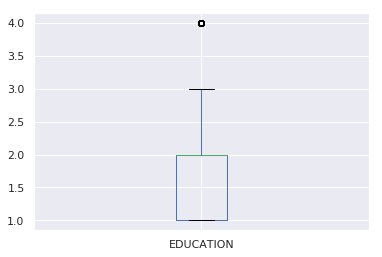

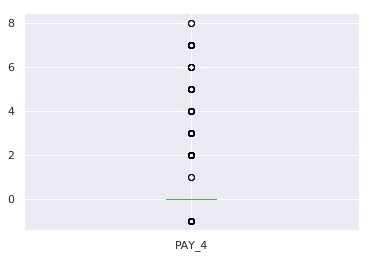

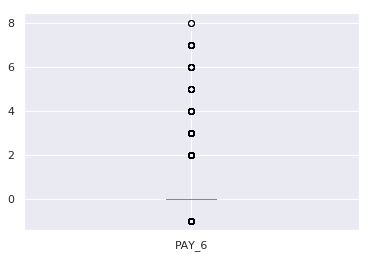

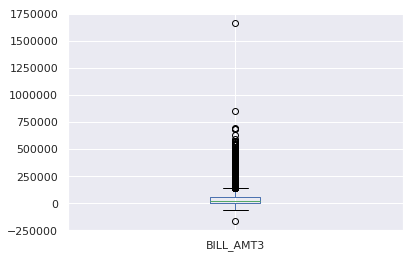

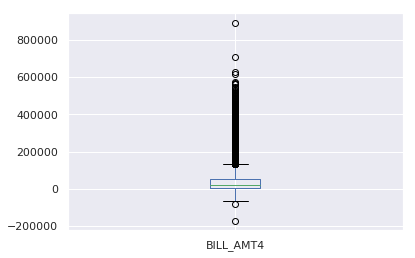

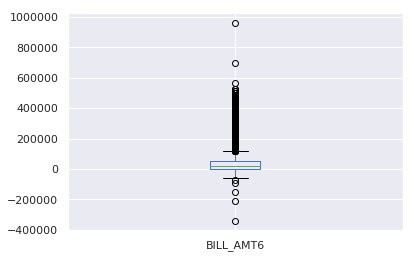

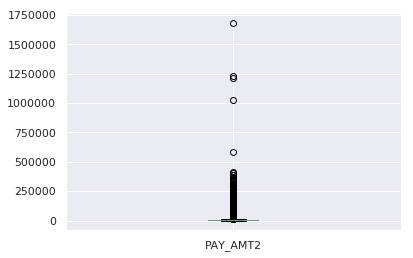

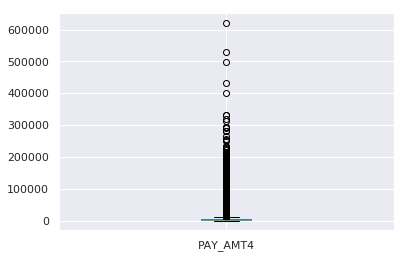

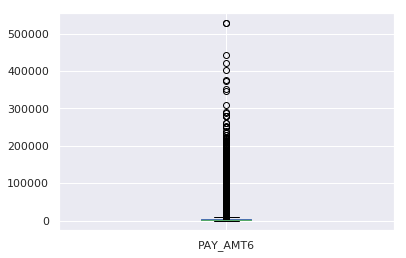

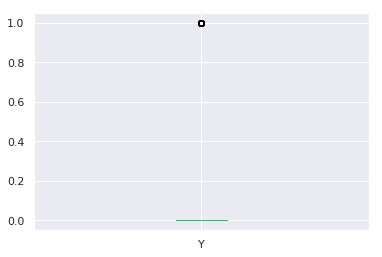

In [19]:
for column in df:
    plt.figure()
    plt.tight_layout()
    df.boxplot([column])

##### Visulization  --- some of the ideas and code shown below was used in https://www.kaggle.com/anubhavkapoor/credit-card-visualisation

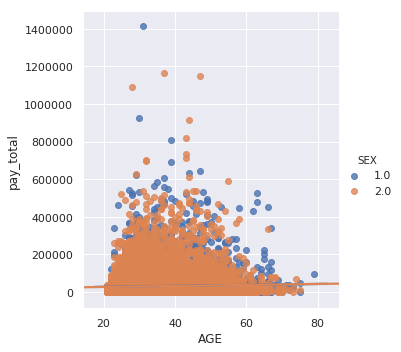

In [20]:

#Male & Female default ratio on the basis of pay_total & age
df['pay_total'] = (df.PAY_AMT1 + df.PAY_AMT2 + df.PAY_AMT3 + df.PAY_AMT4 + df.PAY_AMT5 + df.PAY_AMT6)
df.pay_total = df.pay_total.where(df.pay_total < 1500000)
sns.lmplot(x="AGE", y=("pay_total"), data = df, hue = "SEX")

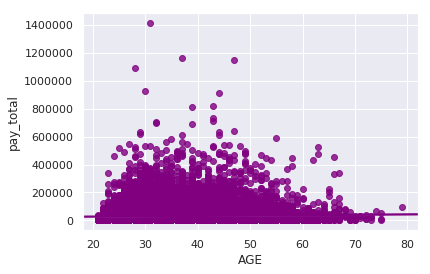

In [21]:
sns.regplot(x="AGE", y=("pay_total"), data = df, color = "purple")

#### Code idea taken from : https://www.kaggle.com/satadru5/credit-card-defaulter-analysis

/opt/tljh/user/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


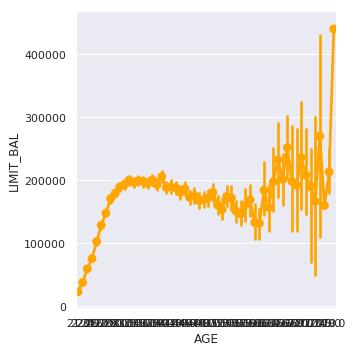

In [22]:
sns.factorplot(x='AGE',y='LIMIT_BAL',data=df, color ="orange")

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

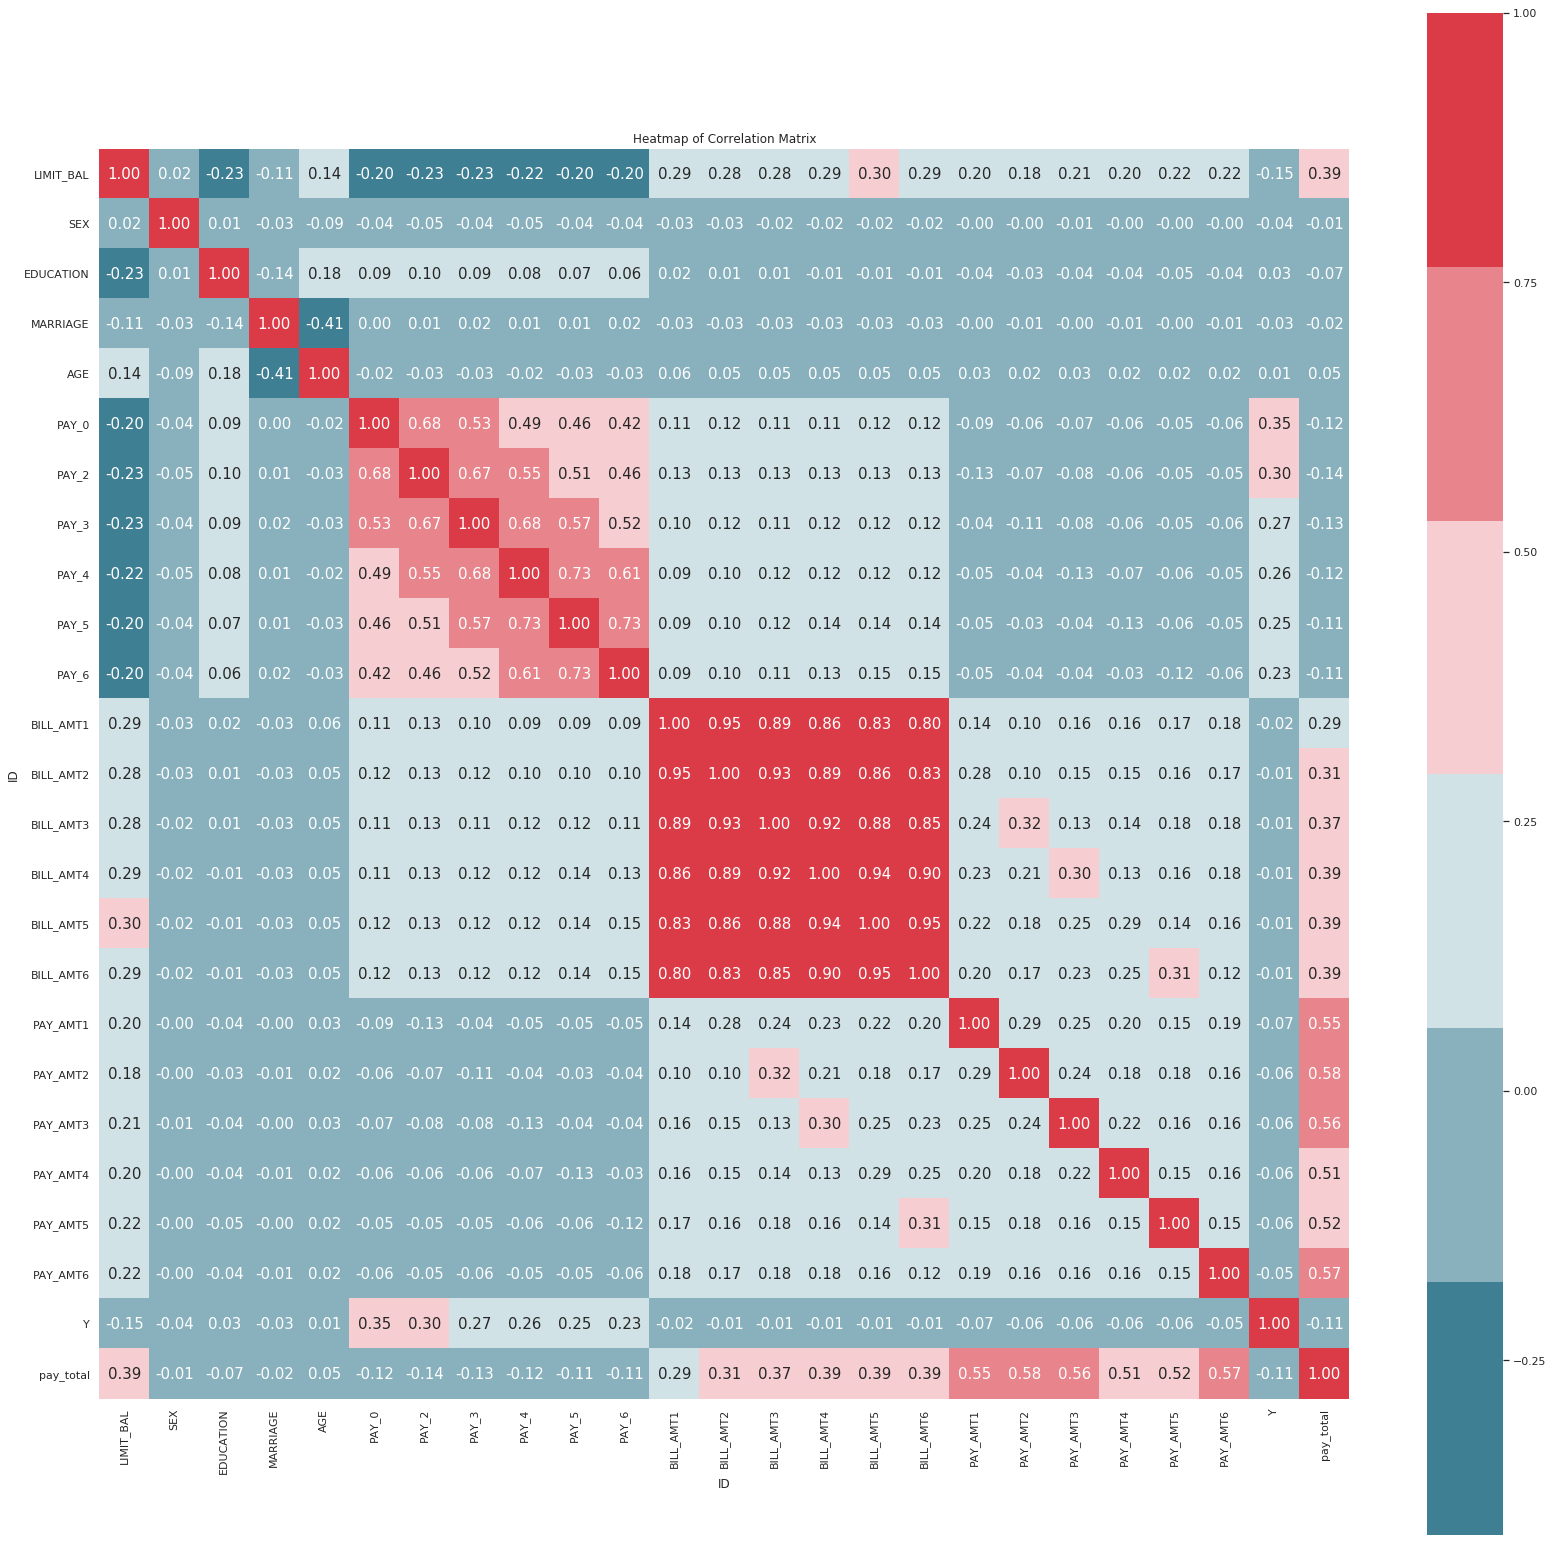

In [23]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(28,28))
sns.heatmap(corr, cbar = True, square = True,  cmap = sns.diverging_palette(220, 10), annot=True, fmt= '.2f',annot_kws={'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Heatmap of Correlation Matrix')


In [24]:
df.Y.value_counts()

0.0    23364
1.0     6636
Name: Y, dtype: int64

In [25]:
# divided columns into two types of variables - target variable (y) and feature variables (X).
X = df.drop(columns=["Y", "pay_total"])
y = df.Y

In [26]:
## Bin the LIMIT BAL column and replace with Logical variables

labels = [" < 80,000", " <= 200,0000", " > 200,000"]
bins = [0, 80000, 200000, 30000000]
df['binned'] = pd.cut(df['LIMIT_BAL'], bins, labels = labels)
print(df['binned'].value_counts())
df = df.join(pd.get_dummies(df['binned'], prefix = 'Limit Bal'))
df = df.drop(["LIMIT_BAL","binned"], axis = 1)



 < 80,000       10799
 > 200,000       9622
 <= 200,0000     9579
Name: binned, dtype: int64


In [27]:
df = df.join(pd.get_dummies(df['SEX'], prefix = 'Is Male?'))
df

SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
1      2.0        2.0       1.0  24.0    2.0    2.0   -1.0   -1.0    0.0   
2      2.0        2.0       2.0  26.0   -1.0    2.0    0.0    0.0    0.0   
3      2.0        2.0       2.0  34.0    0.0    0.0    0.0    0.0    0.0   
4      2.0        2.0       1.0  37.0    0.0    0.0    0.0    0.0    0.0   
5      1.0        2.0       1.0  57.0   -1.0    0.0   -1.0    0.0    0.0   
6      1.0        1.0       2.0  37.0    0.0    0.0    0.0    0.0    0.0   
7      1.0        1.0       2.0  29.0    0.0    0.0    0.0    0.0    0.0   
8      2.0        2.0       2.0  23.0    0.0   -1.0   -1.0    0.0    0.0   
9      2.0        3.0       1.0  28.0    0.0    0.0    2.0    0.0    0.0   
10     1.0        3.0       2.0  35.0    0.0    0.0    0.0    0.0   -1.0   
11     2.0        3.0       2.0  34.0    0.0    0.0    2.0    0.0    0.0   
12     2.0        1.0       2.0  51.0   -1.0   -1.0   -1.0   -1.0   -1.0   
13     2.0        2.0       2.0  41.0   -1.0    0.0   -1.0   -1.0   -1.0   
14     1.0        2.0       2.0  30.0    1.0    2.0    2.0    0.0    0.0   
15     1.0        1.0       2.0  29.0    0.0    0.0    0.0    0.0    0.0   
16     2.0        3.0       3.0  23.0    1.0    2.0    0.0    0.0    0.0   
17     1.0        1.0       2.0  24.0    0.0    0.0    2.0    2.0    2.0   
18     1.0        1.0       1.0  49.0    0.0    0.0    0.0   -1.0   -1.0   
19     2.0        1.0       1.0  49.0    1.0    0.0    0.0    0.0    0.0   
20     2.0        1.0       2.0  29.0    1.0    0.0    0.0    0.0    0.0   
21     2.0        3.0       2.0  39.0    0.0    0.0    0.0    0.0    0.0   
22     2.0        2.0       1.0  39.0   -1.0   -1.0   -1.0   -1.0   -1.0   
23     2.0        2.0       2.0  26.0    2.0    0.0    0.0    2.0    2.0   
24     2.0        1.0       1.0  40.0    0.0    0.0    0.0    0.0    0.0   
25     1.0        1.0       2.0  23.0    0.0    0.0    0.0   -1.0    0.0   
26     1.0        3.0       2.0  23.0    0.0    0.0    0.0    0.0    0.0   
27     1.0        1.0       2.0  27.0    1.0    0.0   -1.0   -1.0   -1.0   
28     2.0        3.0       2.0  30.0    0.0    0.0    0.0    0.0    0.0   
29     2.0        3.0       1.0  47.0   -1.0   -1.0   -1.0   -1.0   -1.0   
30     1.0        1.0       2.0  26.0    0.0    0.0    0.0    0.0    0.0   
...    ...        ...       ...   ...    ...    ...    ...    ...    ...   
29971  1.0        1.0       1.0  34.0   -1.0   -1.0   -1.0    0.0    0.0   
29972  1.0        3.0       1.0  36.0    0.0    0.0    0.0    0.0    0.0   
29973  1.0        1.0       1.0  37.0    0.0    0.0    0.0    0.0    0.0   
29974  1.0        2.0       1.0  35.0    1.0    0.0    0.0    0.0    0.0   
29975  1.0        2.0       1.0  37.0    1.0    2.0    2.0    2.0    0.0   
29976  1.0        2.0       1.0  41.0    0.0    0.0   -1.0   -1.0    0.0   
29977  1.0        2.0       2.0  47.0    2.0    2.0    3.0    2.0    2.0   
29978  1.0        1.0       2.0  34.0    0.0    0.0    0.0    0.0    0.0   
29979  1.0        2.0       1.0  39.0    0.0    0.0    0.0    0.0    0.0   
29980  1.0        1.0       1.0  32.0    0.0    0.0    0.0    0.0    0.0   
29981  1.0        3.0       2.0  42.0    0.0    0.0    0.0    0.0    0.0   
29982  1.0        2.0       1.0  44.0    1.0    2.0    2.0    2.0    0.0   
29983  1.0        2.0       1.0  36.0    0.0    0.0    0.0    0.0    0.0   
29984  1.0        2.0       1.0  44.0    0.0    0.0    0.0    0.0    0.0   
29985  1.0        2.0       2.0  38.0   -1.0   -1.0    0.0   -1.0   -1.0   
29986  1.0        1.0       2.0  30.0    0.0    0.0    0.0    0.0    0.0   
29987  1.0        1.0       2.0  35.0   -1.0   -1.0    0.0    0.0    0.0   
29988  1.0        1.0       2.0  34.0    0.0    0.0    0.0    0.0    0.0   
29989  1.0        1.0       1.0  34.0    0.0    0.0    0.0    0.0    0.0   
29990  1.0        1.0       2.0  35.0   -1.0   -1.0   -1.0   -1.0   -1.0   
29991  1.0        2.0       1.0  41.0    0.0    0.0    

### Normalize using Z score

In [28]:
from sklearn import preprocessing
data = X
scaler = preprocessing.StandardScaler()
    
data_scaled = scaler.fit_transform(data)
    
X = pd.DataFrame(data_scaled)

/home/jupyter-mbrowne1/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyter-mbrowne1/.local/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Normalize using Minmax

In [29]:
from sklearn import preprocessing
df = X.values
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(df)
X = pd.DataFrame(X)


In [30]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 

In [31]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/home/jupyter-mbrowne1/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[6861,  202],
       [1433,  504]])

Text(0.5, 257.44, 'Predicted label')

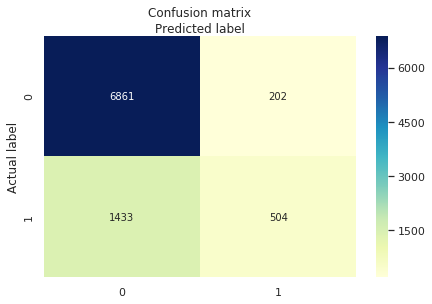

In [33]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) #HOW OFTEN YOU WILL PREDICT A POSITIVE
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print('F1:', metrics.f1_score(y_test,y_pred))

Accuracy: 0.8183333333333334
Precision: 0.7138810198300283
Recall: 0.2601961796592669
F1: 0.38138479001135067


In [35]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())


In [ ]:
df.Y.value_counts().plot(kind = "bar")

In [ ]:
for column in quant_df:
    plt.figure()
    quant_df.plot.bar([column])

## Let's look at the target variable.

In [ ]:
df.Y.value_counts().plot(kind='bar')

There is some inbalance here, so we need to note to do some sort of imbalance handling later in the pipeline.

Now let's look at some univariate plots to get a sense of what our features look like.

In [ ]:
df.columns

In [ ]:
#create histograms for each variable
#we'll group some of the columns together to make plotting easier

df_group1 = df.iloc[:, 0:5]
df_group1.plot(kind='density', subplots=True, layout=(3,2), sharex=False)
plt.show()


#df.hist()
#plt.show()

Some notes: LIMIT_BAL and AGE are approaching a gaussian shape, but both are somewhat rightly skewed. Both sex and Marriage are bimodal (obviously), and Education is trimodal, with the three most common values of 1, 2, 3, and a tiny amount of 4, and 5. Besides LIMIT_BAL, nothing particular about these features. 

Next, we'll look at the Payment history. Since the values in these features are categorical in nature, we'll use bar plots.


In [ ]:
#create group
df_pay_hist = df.iloc[:,5:11]

fig, ax = plt.subplots(figsize = (10,8), sharex=True)


plt.subplot(3,2,1)
df['PAY_0'].value_counts().plot(kind='bar')

plt.subplot(3,2,2)
df['PAY_2'].value_counts().plot(kind='bar')

plt.subplot(3,2,3)
df['PAY_3'].value_counts().plot(kind='bar')

plt.subplot(3,2,4)
df['PAY_4'].value_counts().plot(kind='bar')

plt.subplot(3,2,5)
df['PAY_5'].value_counts().plot(kind='bar')

plt.subplot(3,2,6)
df['PAY_6'].value_counts().plot(kind='bar')





Some notes: all the plots are pretty much the same. Values of 0 are the most common by a large amount, i.e. another instance of some class inbalance. Will have to handle as well. 

Next, look at the Bill amounts.

In [ ]:
df['BILL_AMT1'].plot(kind='hist', )

In [ ]:
#create group
ax, fig = plt.subplots(figsize = (10,8))
bill_amts = df.iloc[:, 11:17]

plt.subplot(3,2,1)
bill_amts['BILL_AMT1'].hist(bins=25)

plt.subplot(3,2,2)
bill_amts['BILL_AMT2'].hist(bins=25)

plt.subplot(3,2,3)
bill_amts['BILL_AMT3'].hist(bins=25)

plt.subplot(3,2,4)
bill_amts['BILL_AMT4'].hist(bins=25)

plt.subplot(3,2,5)
bill_amts['BILL_AMT5'].hist(bins=25)

plt.subplot(3,2,6)
bill_amts['BILL_AMT6'].hist(bins=25)




In [ ]:
import seaborn as sns
for column in df:
    plt.figure()
    df.boxplot([column])

In [ ]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
print(z)

In [ ]:
threshold = 4
df1 = np.where(z > 3)

In [ ]:
df1.count

In [ ]:
np.ma.count(df1)

In [ ]:
filt_df = df.columns[:-1]

In [ ]:
filt_df

In [ ]:
df.boxplot

In [ ]:
z = np.abs(stats.zscore(df))
print(z)

In [ ]:
df = np.where(z > 1)

### 

In [ ]:
df

In [ ]:
df[outstanding_bal] = (df.PAY_AMT1 - df.BILL_AMT1)